In [1]:
import cv2
import numpy as np
import os
from math import ceil
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
data_dir: str = "/Users/spunk/college/work/chip-imaging/backend/prototyping/sample_data"

In [13]:
def apply_gain(img: np.ndarray, gain: int):
  gainFactor = ceil(np.log10(gain) / np.log10(2))

  # limit pixel brightnesses to ensure multiplying
  # will not overflow
  np.clip(img, 0, 2**(16-gainFactor)-1, out=img)
  np.multiply(img, np.array(gain)
      .astype(np.float64), out=img, casting='unsafe')
  
  # since we specified out=img in each np call, our 
  # original image has been modified

In [28]:
def get_sample_data(directory: str) -> list[np.ndarray]:
  images = []
  for file_name in os.listdir(directory):
    if file_name.endswith(".TIFF"):
      print(file_name)
      file_path = os.path.join(directory, file_name)
      image = Image.open(file_path)
      image = np.array(image).astype(np.float64)
      image /= 65535
      image *= 255
      images.append(np.array(image))


  images = np.array(images)
  return images



In [29]:
images = get_sample_data(data_dir)

im2.TIFF
im3.TIFF
im4.TIFF
im5.TIFF
im6.TIFF
im7.TIFF
im1.TIFF


In [30]:
images[0]

array([[1.62256809, 1.59922179, 1.53696498, ..., 1.50972763, 1.51361868,
        1.80933852],
       [1.43968872, 1.43579767, 1.41245136, ..., 1.53696498, 1.58365759,
        1.92217899],
       [1.46692607, 1.43968872, 1.39688716, ..., 1.93385214, 1.6770428 ,
        1.56420233],
       ...,
       [1.60700389, 1.39688716, 1.27626459, ..., 1.47859922, 1.45914397,
        1.48638132],
       [1.47859922, 1.3618677 , 1.17898833, ..., 1.46303502, 1.45914397,
        1.47470817],
       [1.26459144, 1.27626459, 1.23735409, ..., 1.52918288, 1.40466926,
        1.54085603]])

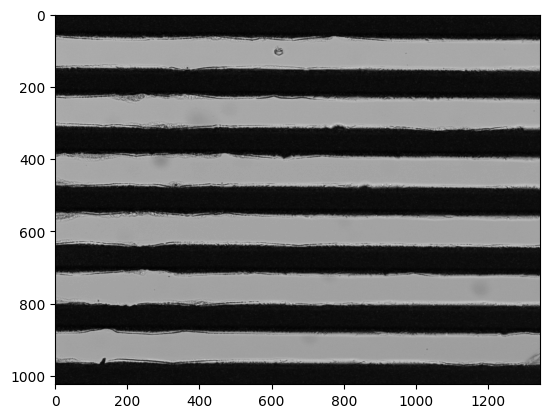

In [31]:
plt.imshow(images[0], cmap='gray')

In [38]:
def stitch_images(images):
  stitcher = cv2.Stitcher_create()
  print(images[0].shape)

  status, result = stitcher.stitch(images)
  if status != cv2.Stitcher_OK:
         print("Can't stitch images, error code = %d" % status)
  
  return result

In [39]:
stitch_images(images)

(1024, 1344)


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
